This notebook tests how we will generate pass managers for each transpilation. 

In [1]:
from IPython.display import display
from circuits.circuit_files import get_circuits_from_directory
from sabre_mods.sabre_swap_v0_20_ import SabreSwap
from pass_managers import build_lp, build_rp, build_pm


# Setup circuit and coupling map

In [2]:
from circuits.circuit_files import get_circuits_from_directory
from coupling_maps.coupling_maps_files import file_to_coupling_map

In [3]:
qc_list = get_circuits_from_directory("circuits/ghz")
qc      = qc_list[5]
cm      = file_to_coupling_map("coupling_maps/heavy_hex_007.txt")


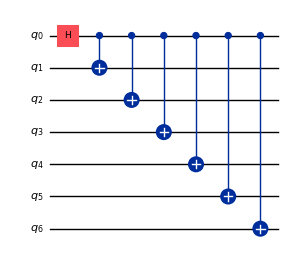

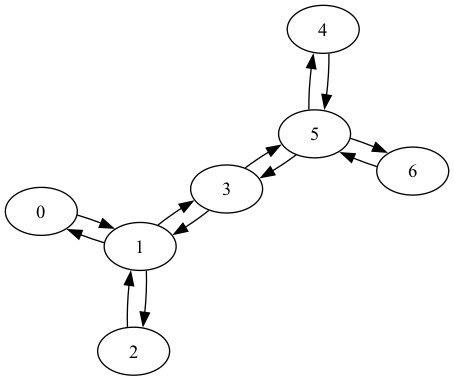

In [4]:
display(qc.draw(output='mpl', scale=0.5))
display(cm.draw())

# Regular Transpilation

In [5]:
rp_str = "sabre_v0_20_"
lp_str = "sabre_layout"

rp = build_rp(rp_str, cm)
lp = build_lp(lp_str, cm, rp)
pm = build_pm(rp, lp, cm)

Using seed 42 for routing pass.
    Building Sabre v0.20 routing pass
Using seed 42 and max iterations 1 for layout pass.
    Building Sabre layout pass


In [6]:
qc_tr = pm.run(qc)

Running SabreSwap_v0_20
Running SabreSwap_v0_20
Running SabreSwap_v0_20
